# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import library dengan pengelompokan berdasarkan fungsi
# Manipulasi data
import numpy as np
import pandas as pd
from scipy import stats

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Model dan evaluasi
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Penyimpanan model
import joblib

# Pengaturan style untuk visualisasi
plt.style.use('ggplot')
sns.set(style='whitegrid')

# Mengatur opsi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# Membaca dataset
df = pd.read_csv('/content/data.csv', delimiter=';')

# Menampilkan informasi dasar tentang dataset
print("=== INFORMASI DATASET ===")
print(f"Dimensi dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
print("\nInformasi tipe data:")
df.info()

# Menampilkan beberapa data awal
print("\n=== SAMPEL DATA ===")
display(df.head())

# Statistik deskriptif
print("\n=== STATISTIK DESKRIPTIF ===")
display(df.describe().T)

# Memeriksa nilai yang hilang
print("\n=== CEK NILAI YANG HILANG ===")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Jumlah nilai kosong': missing_values,
                            'Persentase (%)': missing_percent})
display(missing_data[missing_data['Jumlah nilai kosong'] > 0])
print("Tidak ada nilai yang hilang dalam dataset") if missing_values.sum() == 0 else print("Terdapat nilai yang hilang dalam dataset")

# Cek duplikasi data
duplicates = df.duplicated().sum()
print(f"\n=== DUPLIKASI DATA ===\nJumlah data duplikat: {duplicates}")

=== INFORMASI DATASET ===
Dimensi dataset: 4424 baris, 37 kolom

Informasi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 n

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.00,1,19,12,5,9,127.30,1,0,0,1,1,0,20,0,0,0,0,0,0.00,0,0,0,0,0,0.00,0,10.80,1.40,1.74,Dropout
1,1,15,1,9254,1,1,160.00,1,1,3,3,3,142.50,1,0,0,0,1,0,19,0,0,6,6,6,14.00,0,0,6,6,6,13.67,0,13.90,-0.30,0.79,Graduate
2,1,1,5,9070,1,1,122.00,1,37,37,9,9,124.80,1,0,0,0,1,0,19,0,0,6,0,0,0.00,0,0,6,0,0,0.00,0,10.80,1.40,1.74,Dropout
3,1,17,2,9773,1,1,122.00,1,38,37,5,3,119.60,1,0,0,1,0,0,20,0,0,6,8,6,13.43,0,0,6,10,5,12.40,0,9.40,-0.80,-3.12,Graduate
4,2,39,1,8014,0,1,100.00,1,37,38,9,9,141.50,0,0,0,1,0,0,45,0,0,6,9,5,12.33,0,0,6,6,6,13.00,0,13.90,-0.30,0.79,Graduate



=== STATISTIK DESKRIPTIF ===


,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.00,1.18,0.61,1.00,1.00,1.00,1.00,6.00
Application_mode,4424.00,18.67,17.48,1.00,1.00,17.00,39.00,57.00
Application_order,4424.00,1.73,1.31,0.00,1.00,1.00,2.00,9.00
Course,4424.00,8856.64,2063.57,33.00,9085.00,9238.00,9556.00,9991.00
Daytime_evening_attendance,4424.00,0.89,0.31,0.00,1.00,1.00,1.00,1.00
Previous_qualification,4424.00,4.58,10.22,1.00,1.00,1.00,1.00,43.00
Previous_qualification_grade,4424.00,132.61,13.19,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.00,1.87,6.91,1.00,1.00,1.00,1.00,109.00
Mothers_qualification,4424.00,19.56,15.60,1.00,2.00,19.00,37.00,44.00
Fathers_qualification,4424.00,22.28,15.34,1.00,3.00,19.00,37.00,44.00



=== CEK NILAI YANG HILANG ===


,Jumlah nilai kosong,Persentase (%)


Tidak ada nilai yang hilang dalam dataset

=== DUPLIKASI DATA ===
Jumlah data duplikat: 0


<ipython-input-3-c9af33838963>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Status', data=df, palette='viridis')


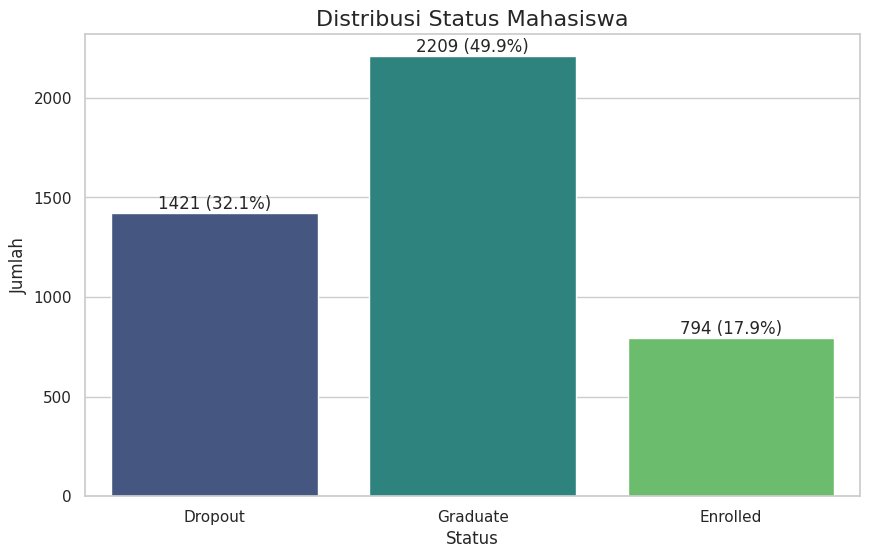

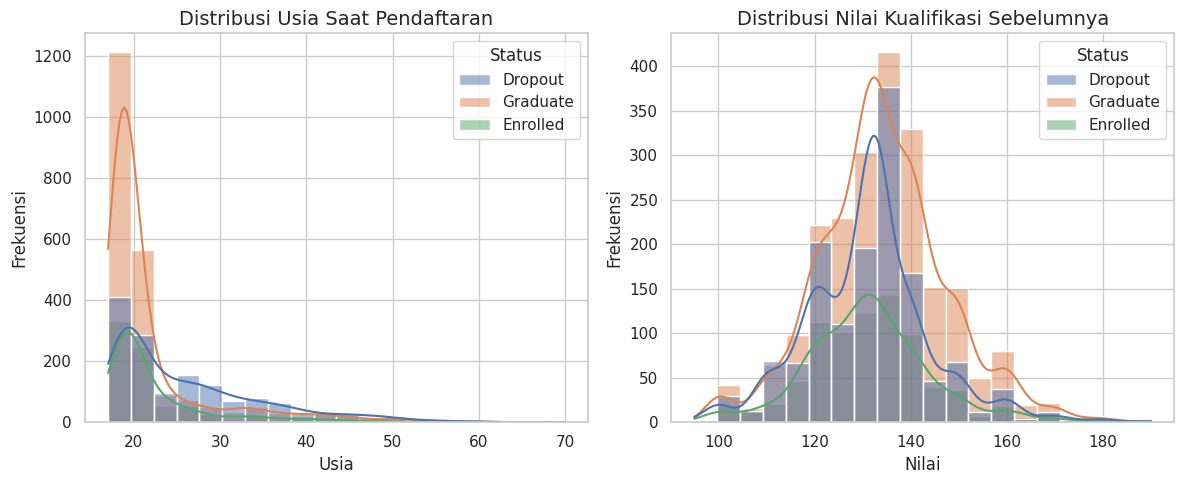

<ipython-input-3-c9af33838963>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df, palette='Set2')
<ipython-input-3-c9af33838963>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df, palette='Set2')
<ipython-input-3-c9af33838963>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Previous_qualification_grade', data=df, palette='Set2')
<ipython-input-3-c9af33838963>:51: FutureWarning: 

Passing `palette` without assigning

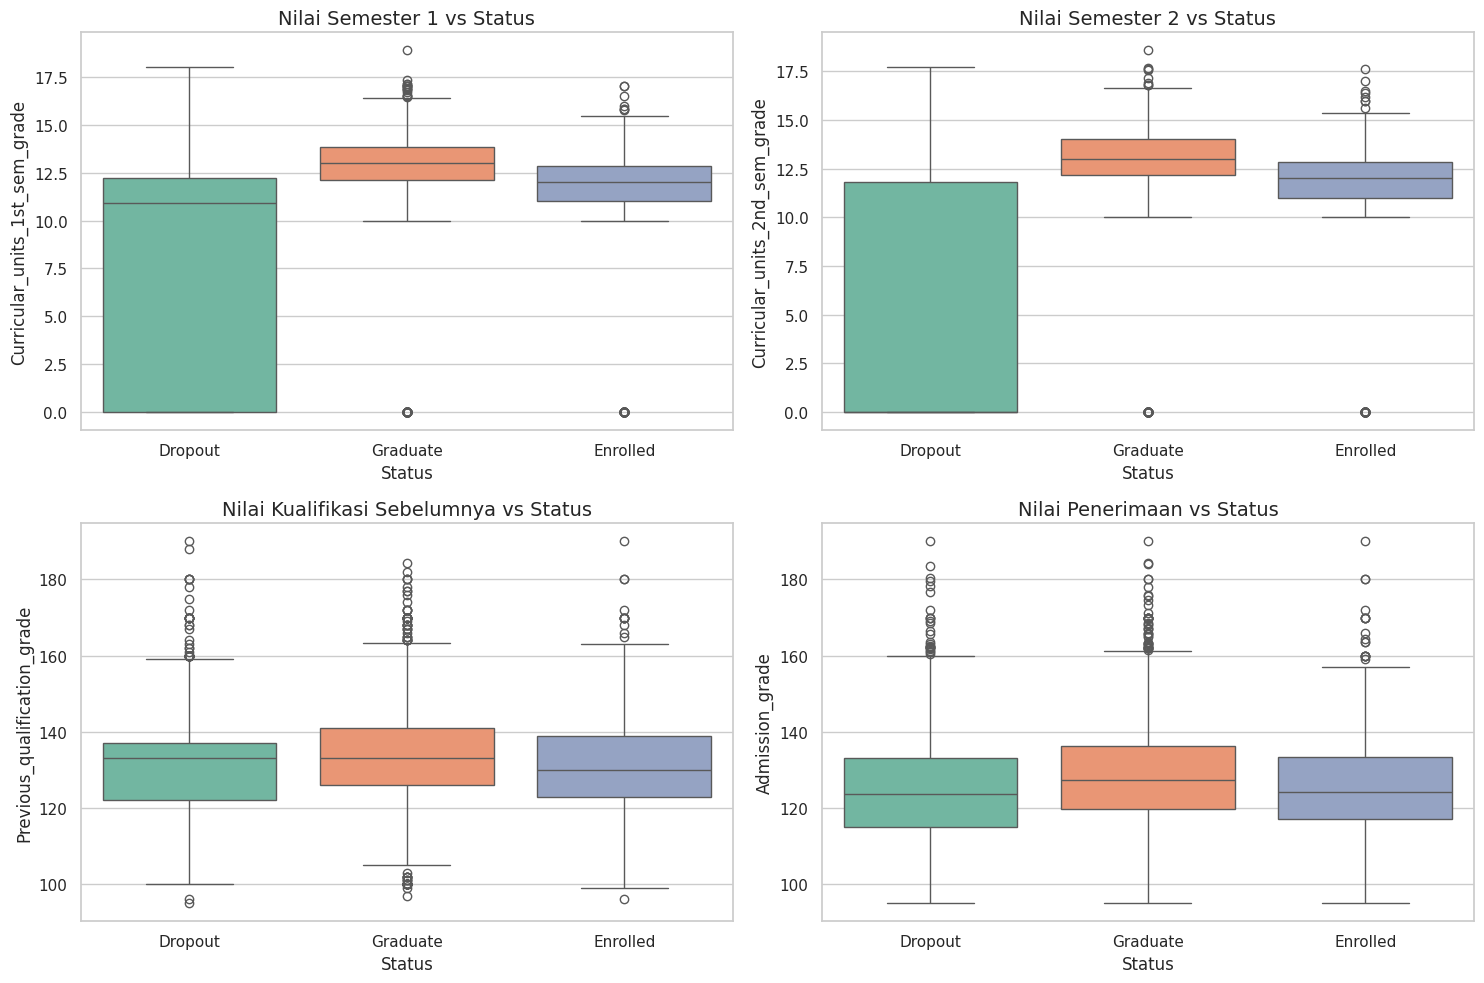


=== KORELASI FITUR DENGAN STATUS GRADUATE ===


,Status_Graduate
Status_Graduate,1.00
Curricular_units_2nd_sem_approved,0.65
Curricular_units_2nd_sem_grade,0.61
Curricular_units_1st_sem_approved,0.55
Curricular_units_1st_sem_grade,0.52
Tuition_fees_up_to_date,0.44
Scholarship_holder,0.31
Curricular_units_2nd_sem_enrolled,0.18
Curricular_units_1st_sem_enrolled,0.16
Admission_grade,0.13


,Status_Graduate
Inflation_rate,-0.03
Mothers_qualification,-0.05
Previous_qualification,-0.06
Curricular_units_1st_sem_without_evaluations,-0.07
Marital_status,-0.10
Curricular_units_2nd_sem_without_evaluations,-0.10
Application_mode,-0.24
Gender,-0.25
Debtor,-0.27
Age_at_enrollment,-0.27


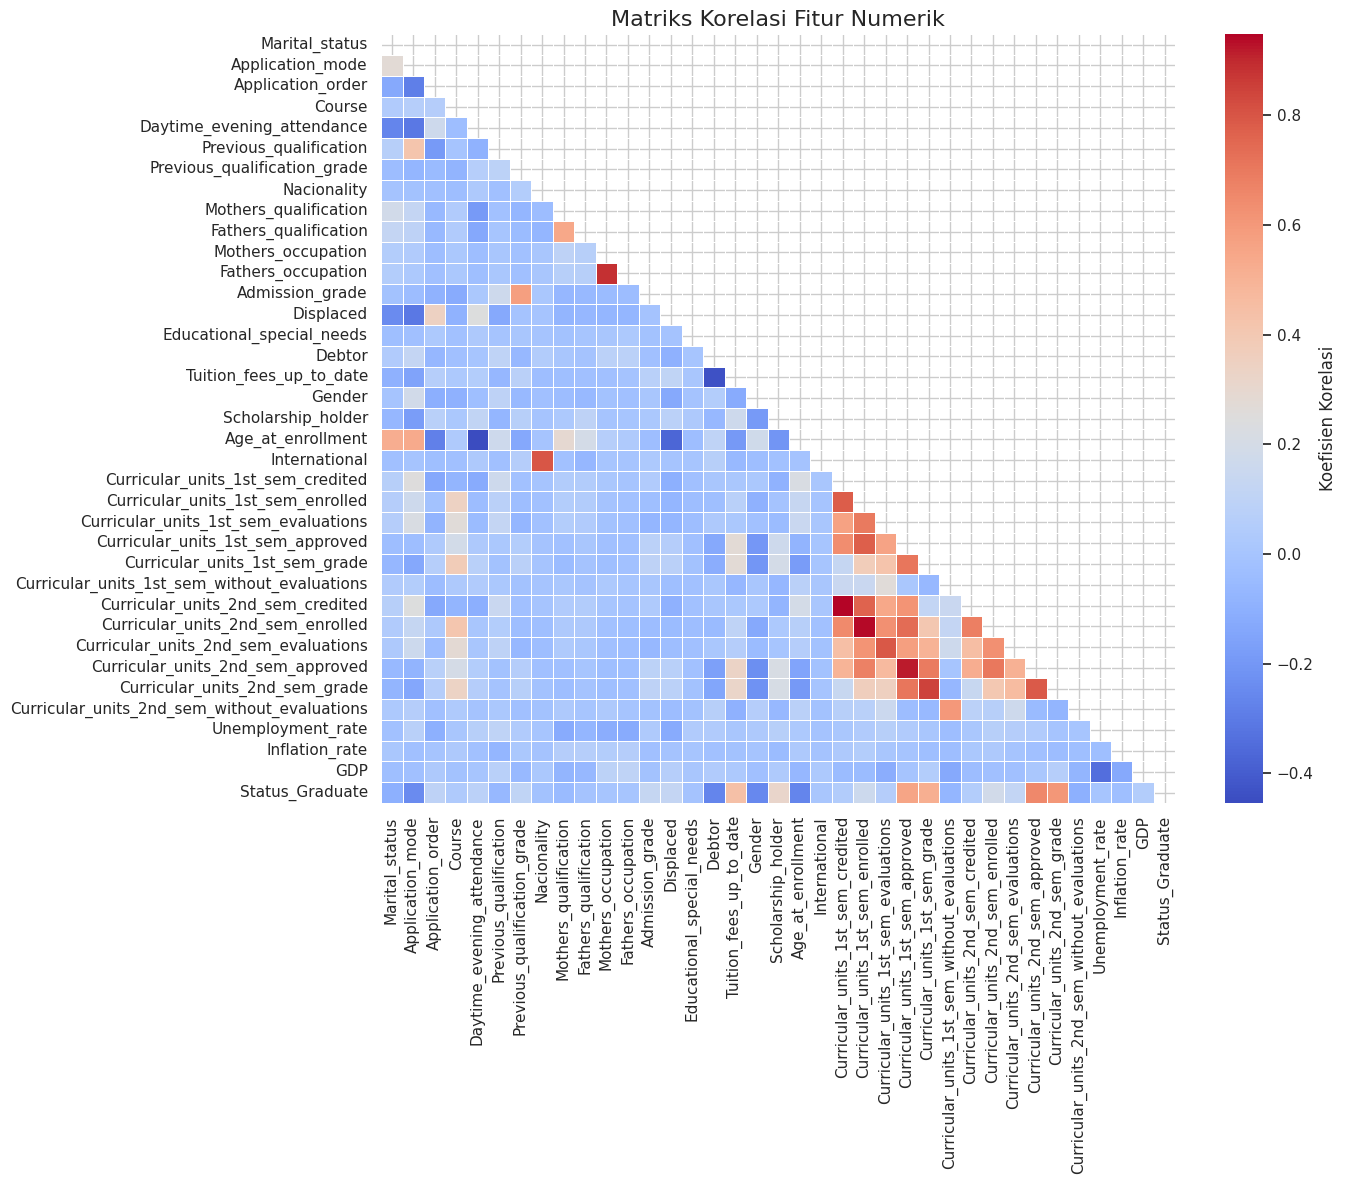

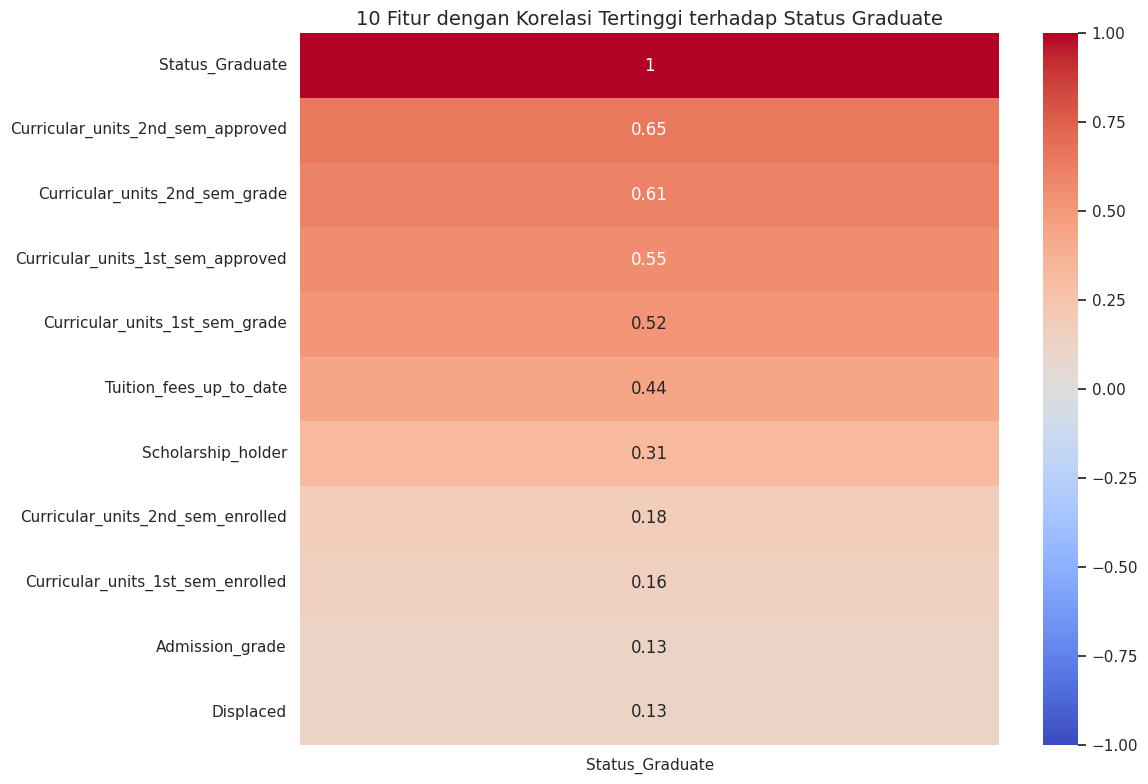

In [3]:
# Distribusi target variable (Status)
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
ax = sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Distribusi Status Mahasiswa', fontsize=16)
plt.xlabel('Status')
plt.ylabel('Jumlah')

# Tambahkan anotasi persentase
total = len(df)
for i, p in enumerate(ax.patches):
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{int(count)} ({percentage:.1f}%)',
                 (p.get_x() + p.get_width() / 2., count),
                 ha = 'center', va = 'bottom')
plt.show()

# Distribusi usia saat pendaftaran
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age_at_enrollment', hue='Status', kde=True, bins=20)
plt.title('Distribusi Usia Saat Pendaftaran', fontsize=14)
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# Distribusi nilai kualifikasi sebelumnya
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Previous_qualification_grade', hue='Status', kde=True, bins=20)
plt.title('Distribusi Nilai Kualifikasi Sebelumnya', fontsize=14)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Analisis bivariat untuk fitur akademik
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df, palette='Set2')
plt.title('Nilai Semester 1 vs Status', fontsize=14)

plt.subplot(2, 2, 2)
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df, palette='Set2')
plt.title('Nilai Semester 2 vs Status', fontsize=14)

plt.subplot(2, 2, 3)
sns.boxplot(x='Status', y='Previous_qualification_grade', data=df, palette='Set2')
plt.title('Nilai Kualifikasi Sebelumnya vs Status', fontsize=14)

plt.subplot(2, 2, 4)
sns.boxplot(x='Status', y='Admission_grade', data=df, palette='Set2')
plt.title('Nilai Penerimaan vs Status', fontsize=14)
plt.tight_layout()
plt.show()

# Visualisasi heatmap korelasi untuk fitur penting
# One-hot encode status untuk korelasi
df_encoded = df.copy()
# Kita hanya tertarik pada status dropout dan graduate, jadi filter dulu
df_encoded = df_encoded[df_encoded['Status'].isin(['Graduate', 'Dropout'])]
# Encode status
df_encoded['Status_Graduate'] = (df_encoded['Status'] == 'Graduate').astype(int)

# Pilih kolom numerik dan target
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
selected_cols = num_cols + ['Status_Graduate']

# Ambil korelasi dengan target
corr_with_target = df_encoded[selected_cols].corr()['Status_Graduate'].sort_values(ascending=False)
print("\n=== KORELASI FITUR DENGAN STATUS GRADUATE ===")
display(corr_with_target.head(10))
display(corr_with_target.tail(10))

# Visualisasi korelasi
plt.figure(figsize=(14, 12))
corr_matrix = df_encoded[selected_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, cbar_kws={'label': 'Koefisien Korelasi'})
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# Visualisasi korelasi fitur penting dengan target
top_corr_features = corr_with_target.index[1:11] # Ambil 10 fitur teratas (kecuali Status_Graduate)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[list(top_corr_features) + ['Status_Graduate']].corr()[['Status_Graduate']].sort_values(
    by='Status_Graduate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('10 Fitur dengan Korelasi Tertinggi terhadap Status Graduate', fontsize=14)
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [4]:
# Membuat salinan data
df_clean = df.copy()

# Filter hanya status Graduate dan Dropout (jika ada status lain seperti Enrolled)
df_clean = df_clean[df_clean['Status'].isin(['Graduate', 'Dropout'])]
print(f"Jumlah data setelah filtering: {df_clean.shape[0]}")

# Encoding variabel target
le_status = LabelEncoder()
df_clean['Status_Encoded'] = le_status.fit_transform(df_clean['Status'])
status_mapping = dict(zip(le_status.classes_, le_status.transform(le_status.classes_)))
print(f"Encoding Status: {status_mapping}")

# Memisahkan fitur dan target
X = df_clean.drop(['Status', 'Status_Encoded'], axis=1)
y = df_clean['Status_Encoded']

# Mengidentifikasi fitur numerik dan kategorikal
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Jumlah fitur numerik: {len(numeric_features)}")
print(f"Jumlah fitur kategorikal: {len(categorical_features)}")
print(f"Total fitur: {len(numeric_features) + len(categorical_features)}")

# Normalisasi fitur numerik dengan RobustScaler
# (lebih robust terhadap outliers dibandingkan StandardScaler)
scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

# Memilih fitur yang paling informatif menggunakan SelectKBest
k_best = 20  # Pilih 20 fitur terbaik
selector = SelectKBest(f_classif, k=k_best)
X_selected = selector.fit_transform(X_scaled, y)
selected_indices = selector.get_support(indices=True)
selected_features = [X_scaled.columns[i] for i in selected_indices]

print(f"\n=== {k_best} FITUR TERPILIH ===")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Membuat DataFrame baru dengan fitur yang dipilih
X_selected_df = X_scaled[selected_features]

# Train-test split dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_df, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\n=== PEMBAGIAN DATA ===")
print(f"Jumlah data latih (X_train): {X_train.shape[0]} samples")
print(f"Jumlah data uji (X_test): {X_test.shape[0]} samples")
print(f"Distribusi kelas di data latih: {np.bincount(y_train)}")
print(f"Distribusi kelas di data uji: {np.bincount(y_test)}")

Jumlah data setelah filtering: 3630
Encoding Status: {'Dropout': np.int64(0), 'Graduate': np.int64(1)}
Jumlah fitur numerik: 36
Jumlah fitur kategorikal: 0
Total fitur: 36

=== 20 FITUR TERPILIH ===
1. Marital_status
2. Application_mode
3. Application_order
4. Daytime_evening_attendance
5. Previous_qualification_grade
6. Admission_grade
7. Displaced
8. Debtor
9. Tuition_fees_up_to_date
10. Gender
11. Scholarship_holder
12. Age_at_enrollment
13. Curricular_units_1st_sem_enrolled
14. Curricular_units_1st_sem_approved
15. Curricular_units_1st_sem_grade
16. Curricular_units_2nd_sem_enrolled
17. Curricular_units_2nd_sem_evaluations
18. Curricular_units_2nd_sem_approved
19. Curricular_units_2nd_sem_grade
20. Curricular_units_2nd_sem_without_evaluations

=== PEMBAGIAN DATA ===
Jumlah data latih (X_train): 2722 samples
Jumlah data uji (X_test): 908 samples
Distribusi kelas di data latih: [1066 1656]
Distribusi kelas di data uji: [355 553]


## Modeling

In [5]:
# Daftar model yang akan diuji
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=1000)
}

# Menyimpan hasil
results = {}

# Evaluasi setiap model
for name, model in models.items():
    print(f"\n=== PELATIHAN MODEL: {name} ===")

    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Perbandingan hasil model
results_df = pd.DataFrame(results).T
print("\n=== PERBANDINGAN KINERJA MODEL ===")
display(results_df)

# Pilih model terbaik berdasarkan F1-score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
print(f"\n=== MODEL TERBAIK ===\nModel terbaik berdasarkan F1-score: {best_model_name}")

# Optimasi hyperparameter untuk model terbaik
print(f"\n=== OPTIMASI HYPERPARAMETER UNTUK {best_model_name} ===")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced']
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    }
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'gamma': ['scale', 'auto', 0.1, 1.0],
        'kernel': ['rbf', 'linear']
    }
else:  # MLP Classifier
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }

# Cross-validation dengan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV untuk optimasi hyperparameter (lebih cepat dari GridSearchCV)
random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions=param_grid,
    n_iter=10,  # Jumlah kombinasi parameter yang akan dicoba
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Pelatihan
random_search.fit(X_train, y_train)

print(f"\nParameter terbaik: {random_search.best_params_}")
print(f"Skor f1 terbaik: {random_search.best_score_:.4f}")

# Simpan model terbaik yang telah dioptimasi
best_optimized_model = random_search.best_estimator_


=== PELATIHAN MODEL: Random Forest ===
Accuracy: 0.9119
Precision: 0.8922
Recall: 0.9729
F1 Score: 0.9308
AUC: 0.9451

=== PELATIHAN MODEL: Gradient Boosting ===
Accuracy: 0.9163
Precision: 0.8968
Recall: 0.9747
F1 Score: 0.9341
AUC: 0.9511

=== PELATIHAN MODEL: Logistic Regression ===
Accuracy: 0.9141
Precision: 0.8965
Recall: 0.9711
F1 Score: 0.9323
AUC: 0.9476

=== PELATIHAN MODEL: SVM ===
Accuracy: 0.9141
Precision: 0.8887
Recall: 0.9819
F1 Score: 0.9330
AUC: 0.9497

=== PELATIHAN MODEL: MLP Classifier ===
Accuracy: 0.8976
Precision: 0.8952
Recall: 0.9421
F1 Score: 0.9181
AUC: 0.9232

=== PERBANDINGAN KINERJA MODEL ===


,Accuracy,Precision,Recall,F1 Score,AUC
Random Forest,0.91,0.89,0.97,0.93,0.95
Gradient Boosting,0.92,0.90,0.97,0.93,0.95
Logistic Regression,0.91,0.90,0.97,0.93,0.95
SVM,0.91,0.89,0.98,0.93,0.95
MLP Classifier,0.90,0.90,0.94,0.92,0.92



=== MODEL TERBAIK ===
Model terbaik berdasarkan F1-score: Gradient Boosting

=== OPTIMASI HYPERPARAMETER UNTUK Gradient Boosting ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Parameter terbaik: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Skor f1 terbaik: 0.9238


## Evaluation


=== EVALUASI MODEL YANG DIOPTIMASI ===
Accuracy: 0.9141
Precision: 0.8992
Recall: 0.9675
F1 Score: 0.9321
AUC: 0.9475

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.94      0.83      0.88       355
    Graduate       0.90      0.97      0.93       553

    accuracy                           0.91       908
   macro avg       0.92      0.90      0.91       908
weighted avg       0.92      0.91      0.91       908



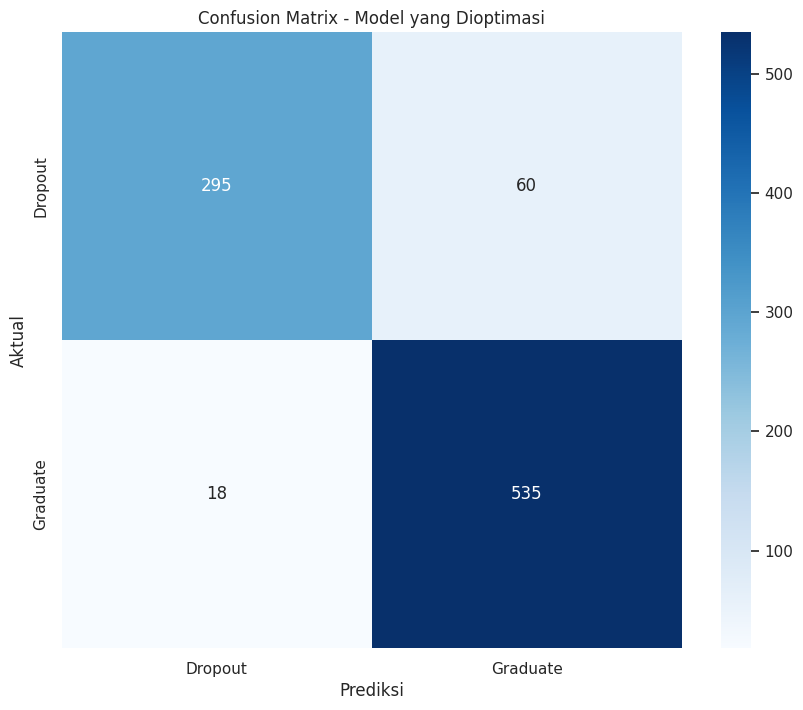

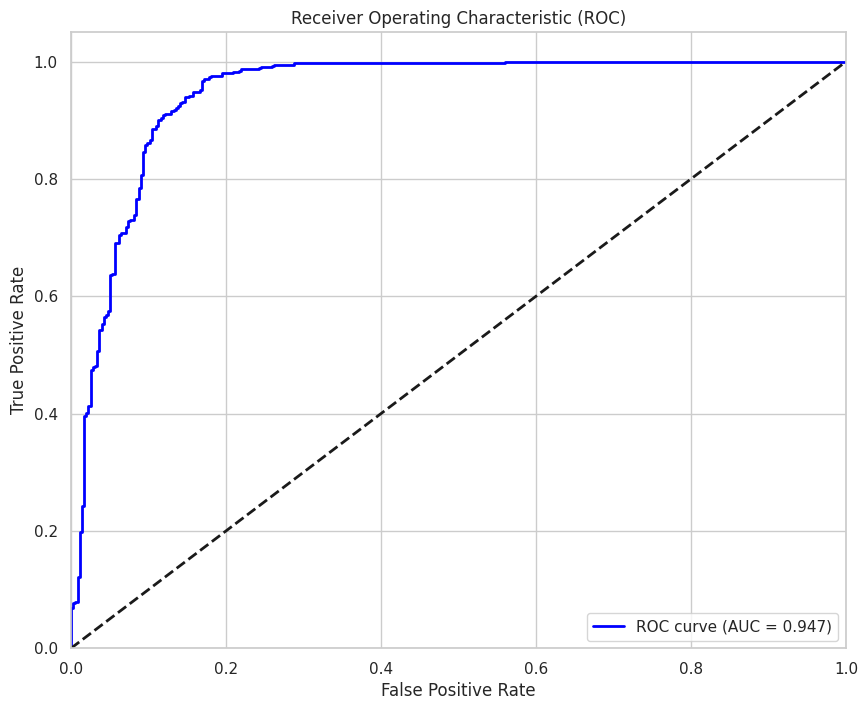

<ipython-input-6-0ef7d434f7b6>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kepentingan', y='Fitur', data=feature_importance_df, palette='viridis')


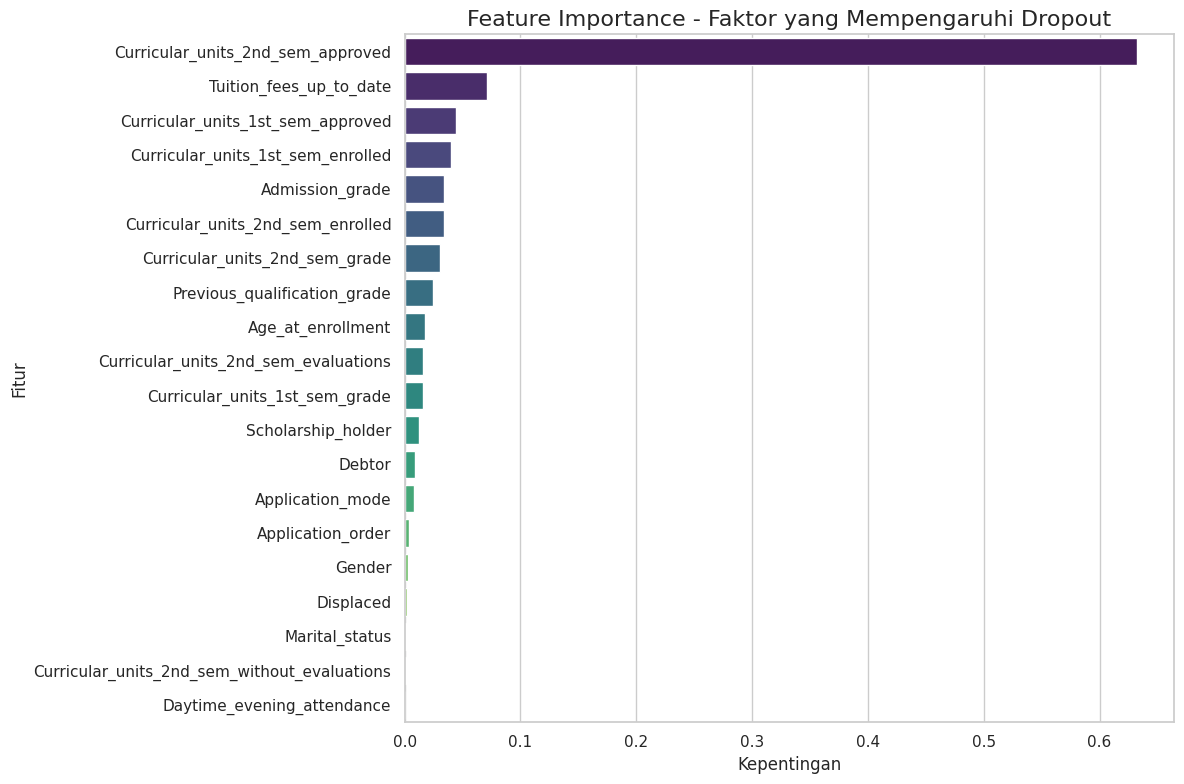


=== FITUR TERPENTING DALAM MEMPREDIKSI DROPOUT ===


,Fitur,Kepentingan
17,Curricular_units_2nd_sem_approved,0.63
8,Tuition_fees_up_to_date,0.07
13,Curricular_units_1st_sem_approved,0.04
12,Curricular_units_1st_sem_enrolled,0.04
5,Admission_grade,0.03
15,Curricular_units_2nd_sem_enrolled,0.03
18,Curricular_units_2nd_sem_grade,0.03
4,Previous_qualification_grade,0.02
11,Age_at_enrollment,0.02
16,Curricular_units_2nd_sem_evaluations,0.02


In [6]:
# Evaluasi model yang telah dioptimasi
y_pred_optimized = best_optimized_model.predict(X_test)
y_prob_optimized = best_optimized_model.predict_proba(X_test)[:, 1]

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
auc = roc_auc_score(y_test, y_prob_optimized)

print("\n=== EVALUASI MODEL YANG DIOPTIMASI ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=le_status.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le_status.classes_,
           yticklabels=le_status.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Model yang Dioptimasi')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_optimized)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance untuk model berbasis tree
if hasattr(best_optimized_model, 'feature_importances_'):
    # Mendapatkan feature importance
    importances = best_optimized_model.feature_importances_

    # Membuat dataframe untuk feature importance
    feature_importance_df = pd.DataFrame({
        'Fitur': selected_features,
        'Kepentingan': importances
    })

    # Mengurutkan berdasarkan kepentingan
    feature_importance_df = feature_importance_df.sort_values('Kepentingan', ascending=False)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Kepentingan', y='Fitur', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance - Faktor yang Mempengaruhi Dropout', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\n=== FITUR TERPENTING DALAM MEMPREDIKSI DROPOUT ===")
    display(feature_importance_df)
elif hasattr(best_optimized_model, 'coef_'):
    # Untuk model linier seperti Logistic Regression
    coefficients = best_optimized_model.coef_[0]

    # Membuat dataframe untuk koefisien
    coefficients_df = pd.DataFrame({
        'Fitur': selected_features,
        'Koefisien': coefficients
    })

    # Mengurutkan berdasarkan nilai absolut koefisien
    coefficients_df['Koefisien_abs'] = abs(coefficients_df['Koefisien'])
    coefficients_df = coefficients_df.sort_values('Koefisien_abs', ascending=False).drop('Koefisien_abs', axis=1)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    colors = ['red' if c < 0 else 'green' for c in coefficients_df['Koefisien']]
    sns.barplot(x='Koefisien', y='Fitur', data=coefficients_df, palette=colors)
    plt.title('Koefisien Fitur - Faktor yang Mempengaruhi Dropout', fontsize=16)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.tight_layout()
    plt.show()

    print("\n=== KOEFISIEN FITUR DALAM MEMPREDIKSI DROPOUT ===")
    display(coefficients_df)
else:
    print("Model tidak mendukung visualisasi feature importance.")

In [7]:
# Simpan model yang telah dioptimasi
model_filename = 'dropout_prediction_model.pkl'
joblib.dump(best_optimized_model, model_filename)
print(f"Model berhasil disimpan sebagai {model_filename}")

# Simpan scaler dan fitur terpilih untuk keperluan deployment
preprocessing_info = {
    'scaler': scaler,
    'selected_features': selected_features,
    'target_encoder': le_status
}
joblib.dump(preprocessing_info, 'preprocessing_info.pkl')
print("Informasi preprocessing berhasil disimpan sebagai preprocessing_info.pkl")

# Contoh prediksi dengan model yang telah dilatih
print("\n=== CONTOH PREDIKSI ===")
print("Mengambil 5 sampel dari data uji:")

sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_sample = X_test.iloc[sample_indices]
y_true = y_test.iloc[sample_indices]

# Lakukan prediksi
y_pred_sample = best_optimized_model.predict(X_sample)
y_prob_sample = best_optimized_model.predict_proba(X_sample)[:, 1]

# Tampilkan hasil
results_sample = pd.DataFrame({
    'Status Sebenarnya': le_status.inverse_transform(y_true),
    'Status Prediksi': le_status.inverse_transform(y_pred_sample),
    'Probabilitas Dropout': y_prob_sample
})

display(results_sample)

# Kesimpulan
print("\n=== KESIMPULAN ===")
print(f"1. Model {best_model_name} yang telah dioptimasi mencapai akurasi {accuracy:.2%} dalam memprediksi status dropout mahasiswa.")
print(f"2. Faktor-faktor utama yang mempengaruhi kemungkinan dropout adalah: {', '.join(feature_importance_df['Fitur'].head(3).tolist() if 'feature_importance_df' in locals() else coefficients_df['Fitur'].head(3).tolist() if 'coefficients_df' in locals() else ['tidak dapat ditentukan'])}")
print("3. Model ini dapat membantu institusi pendidikan untuk mengidentifikasi mahasiswa yang berisiko dropout dan memberikan intervensi yang tepat waktu.")
print("4. Untuk pengembangan lebih lanjut, dapat dilakukan eksplorasi teknik lain seperti balancing data, feature engineering tambahan, atau ensemble model.")

Model berhasil disimpan sebagai dropout_prediction_model.pkl
Informasi preprocessing berhasil disimpan sebagai preprocessing_info.pkl

=== CONTOH PREDIKSI ===
Mengambil 5 sampel dari data uji:


,Status Sebenarnya,Status Prediksi,Probabilitas Dropout
0,Graduate,Graduate,0.83
1,Graduate,Graduate,0.94
2,Dropout,Dropout,0.03
3,Graduate,Graduate,0.78
4,Dropout,Dropout,0.00



=== KESIMPULAN ===
1. Model Gradient Boosting yang telah dioptimasi mencapai akurasi 91.41% dalam memprediksi status dropout mahasiswa.
2. Faktor-faktor utama yang mempengaruhi kemungkinan dropout adalah: Curricular_units_2nd_sem_approved, Tuition_fees_up_to_date, Curricular_units_1st_sem_approved
3. Model ini dapat membantu institusi pendidikan untuk mengidentifikasi mahasiswa yang berisiko dropout dan memberikan intervensi yang tepat waktu.
4. Untuk pengembangan lebih lanjut, dapat dilakukan eksplorasi teknik lain seperti balancing data, feature engineering tambahan, atau ensemble model.
